# Antonyms and Word Vectors

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
%matplotlib inline

## Helper Functions

Source: "How to make a racist AI without really trying"

In [3]:
def load_embeddings(filename):
    
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        
        # Get the file
        for i, line in enumerate(infile):
            if i % 100000 == 0:
                print(i)
            items = line.rstrip().split(' ')
            if len(items) == 2:
                continue
            labels.append(items[0])
            
            values = np.array([float(x) for x in items[1:]], 'f')
            
            # Normalize the values for geometry calculations
            values = normalize(values.reshape(1, -1))
            
            rows.append(values)
        
        arr = np.vstack(rows)
        return pd.DataFrame(arr, index=labels, dtype='f')

## Data In

In [4]:
# We will use the 400K sample since the other samples will kill the machine
embeddings = load_embeddings('data/glove.6B.100d.txt')

0
100000
200000
300000


## Analysis

In [19]:
# Get our two endpoints for our hispanic-american axis
mexican_vector = np.array(embeddings[embeddings.index == 'mexican'])
american_vector = np.array(embeddings[embeddings.index == 'american'])

In [20]:
# Get the direction vector that will define our mexican-american axis
direction = american_vector - mexican_vector

### Antonyms

In [34]:
# Antonyms words to check
antonyms = [('high-quality','low-quality')
            ,('best','worst')
            ,('five-star','one-star')
            ,('tasty','nasty')
            ,('clean','dirty')
            ,('employed','unemployed')
            ,('beautiful','ugly')
            ,('safe','dangerous')
            ,('capable','incapable')
            ,('early','late')
            ,('succeed','fail')
            ,('gentle','rough')
            ,('brave','cowardly')
            ,('intelligent','stupid')
            ,('superior','inferior')
            ,('diligent','lazy')
            ,('quiet','noisy')
            ,('pleasant','unpleasant')
            ,('pure','impure')
            ,('qualified','unqualified')
            ,('courteous','rude')
            ,('sober','drunk')
            ,('safe','unsafe')
            ,('useful','useless')
            ,('obedient','disobedient')
            ,('neat','messy')]

In [35]:
# Let's calculate the displacement of the antonym pair on the mexican-american axis
displacements = list()
for antonym_pair in antonyms:
    positive_word = antonym_pair[0]
    negative_word = antonym_pair[1]
    
    positive_word_position = np.sum(np.array(embeddings[embeddings.index == positive_word]) * direction)/np.linalg.norm(direction)**2 
    negative_word_position = np.sum(np.array(embeddings[embeddings.index == negative_word]) * direction)/np.linalg.norm(direction)**2 
    
    displacements.append(positive_word_position - negative_word_position)

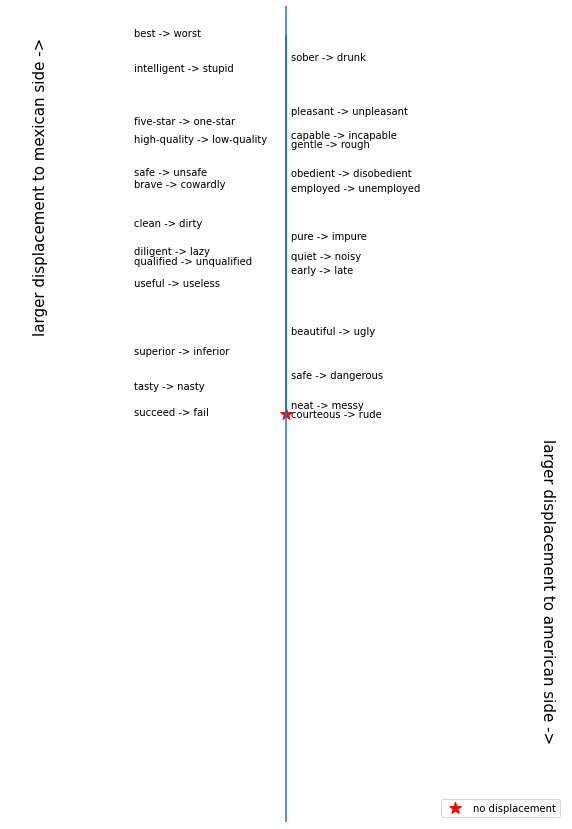

In [36]:
# Let's plot it
fig, ax = plt.subplots(figsize=(10,15))

zeros_for_1d = np.zeros_like(displacements)
ax.scatter(0,0, s=150, marker='*', color='red', label='no displacement')
ax.axvline(0)
ax.plot(zeros_for_1d, displacements)
ax.set_ylim(-0.25,0.25)

# Annotate in order
sorting_indices = np.argsort(np.array(displacements))

for i, ix in enumerate(sorting_indices):
    txt = antonyms[ix][0] + ' -> ' + antonyms[ix][1]
    if i % 2 == 0:
        ax.annotate(txt, (0.001, displacements[ix]))
    else:
        ax.annotate(txt, (-0.03, displacements[ix]))

ax.annotate('larger displacement to mexican side ->', (-0.05, 0.05), rotation=90, fontsize=15)
ax.annotate('larger displacement to american side ->', (0.05, -0.2), rotation=-90, fontsize=15)
ax.legend(loc='lower right')
_ = ax.axis('off')

plt.savefig('img/antonyms_displacement.jpg')

### Other Antonyms

In [37]:
# Antonyms words to check
other_antonyms = [('admit','deny')
                  ,('accept','decline')
                  ,('agree','disagree')
                  ,('alive','dead')
                  ,('known','unknown')
                  ,('internal','external')
                  ,('inside','outside')
                  ,('lengthen','shorten')
                  ,('little','big')
                  ,('loose','tight')
                  ,('maximum','minimum')
                  ,('near','far')
                  ,('narrow','wide')
                  ,('new','old')
                  ,('open','closed')
                  ,('rare','common')
                  ,('right','left')
                  ,('scatter','collect')
                  ,('sweet','sour')
                  ,('sow','reap')
                  ,('tall','short')
                  ,('fold','unfold')
                  ,('appear','vanish')
                  ,('day','night')
                  ,('some','none')]

In [38]:
# Let's calculate the displacement of the antonym pair on the mexican-american axis
other_displacements = list()
for antonym_pair in other_antonyms:
    positive_word = antonym_pair[0]
    negative_word = antonym_pair[1]
    
    positive_word_position = np.sum(np.array(embeddings[embeddings.index == positive_word]) * direction)/np.linalg.norm(direction)**2 
    negative_word_position = np.sum(np.array(embeddings[embeddings.index == negative_word]) * direction)/np.linalg.norm(direction)**2 
    
    other_displacements.append(positive_word_position - negative_word_position)

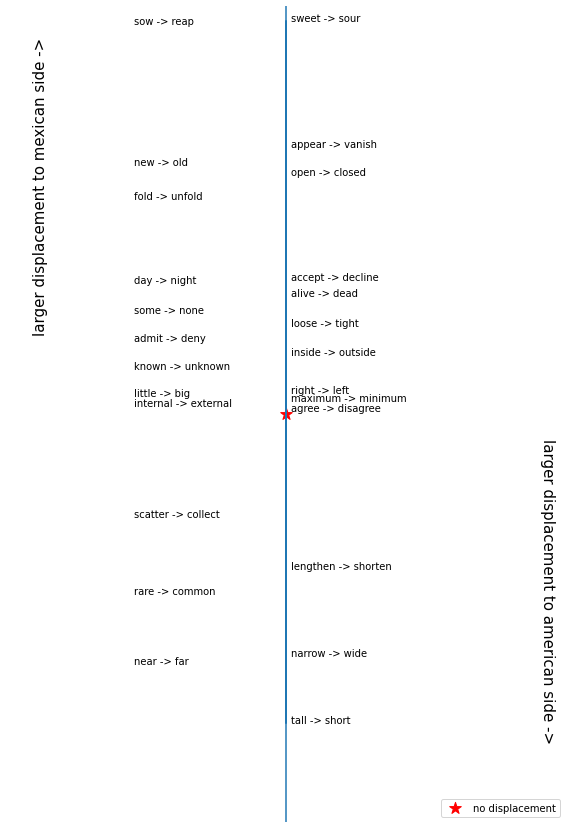

In [39]:
# Let's plot it
fig, ax = plt.subplots(figsize=(10,15))

zeros_for_1d = np.zeros_like(other_displacements)
ax.scatter(0,0, s=150, marker='*', color='red', label='no displacement')
ax.plot(zeros_for_1d, other_displacements)
ax.set_ylim(-0.25,0.25)
ax.axvline(0)

# Annotate in order
sorting_indices = np.argsort(np.array(other_displacements))

for i, ix in enumerate(sorting_indices):
    txt = other_antonyms[ix][0] + ' -> ' + other_antonyms[ix][1]
    if i % 2 == 0:
        ax.annotate(txt, (0.001, other_displacements[ix]))
    else:
        ax.annotate(txt, (-0.03, other_displacements[ix]))

ax.annotate('larger displacement to mexican side ->', (-0.05, 0.05), rotation=90, fontsize=15)
ax.annotate('larger displacement to american side ->', (0.05, -0.2), rotation=-90, fontsize=15)
ax.legend(loc='lower right')
_ = ax.axis('off')

plt.savefig('img/other_antonyms_displacement.jpg')